# Asset Market Equilibrium

Households: h={1,2} with endowments $e^{1}=(1, 1, 2, 1, 2)$ and $e^{2}=(1, 3, 1, 3, 1)$;
States: $s= {1,2,3,4}$;
Assets: $A^{1}$ and $A^{2}$ with Payoffs: $(1,1,1,1)$ and $(1,1,1.5.1.5)$ respectively.

The Agents' utility has the following form:
$$
\begin{array}{c}
\max_{\theta_{1},\theta_{2}} U(c^{z})=v(c_0)+\dfrac{1}{4}\sum_{i=1}^{4}v(c_i)\\
\end{array}
$$
where
$v(c)=\dfrac{c^{1-\gamma}}{1-\gamma}$

For all states in s, agents maximize their utility and choose over the amount of assets to hold: ($\theta^{h}_{1}$,$\theta^{h}_{2}$)

$$\begin{array}{c}
\max_{\theta^{h}_{1},\theta^{h}_{2}} U(c^{h})=v(c_0^{h})+E[v(c_s^{h})]\\
\end{array} $$
s.t. 
$$
\begin{array}{c}
c^h_{0}=e^h_{0}-q_{1}*\theta^h_{1}-q_{2}*\theta^h_{2} \\
c^h_{s}=e^h_{s}+A^1_{s} *\theta^h_{1}+A^2_{s} *\theta^h_{2}\\
\end{array}
$$


The first order conditions for this problem look like the following:

$$
\begin{array}{c}
-q_{1}v'(c^1_{0}) + E[v'(c^1_{s})A^1_{s})]=0\\
-q_{1}v'(c^2_{0}) + E[v'(c^2_{s})A^1_{s})]=0\\
-q_{2}v'(c^1_{0}) + E[v'(c^1_{s})A^2_{s})]=0\\
-q_{2}v'(c^2_{0}) + E[v'(c^2_{s})A^2_{s})]=0\\
\end{array}
$$

As households trade with eachother, the market clears whenever the aggregate holdings are zero for each asset.

$$
\begin{array}{c}
\theta^1_1 +\theta^2_1=0\\
\theta^1_2 +\theta^2_2=0
\end{array}
$$




In [2]:
import numpy as np
from scipy.optimize import fsolve

def AME(x):
    gam=2
    the_1_1=x[0]
    the_1_2=x[1]
    the_2_1=x[2]
    the_2_2=x[3]
    q_1=x[4]
    q_2=x[5]
    f=np.zeros(6)
    c_0_1=1-q_1*the_1_1-q_2*the_2_1
    c_0_2=1-q_1*the_1_2-q_2*the_2_2
    c_1_1=1+the_1_1+the_2_1
    c_1_2=3+the_1_2+the_2_2
    c_2_1=2+the_1_1+the_2_1
    c_2_2=1+the_1_2+the_2_2
    c_3_1=1+the_1_1+1.5*the_2_1
    c_3_2=3+the_1_2+1.5*the_2_2
    c_4_1=2+the_1_1+1.5*the_2_1
    c_4_2=1+the_1_2+1.5*the_2_2
    f[0]=-q_1*c_0_1**(-gam)+0.25*(c_1_1**(-gam)+c_2_1**(-gam)+c_3_1**(-gam)+c_4_1**(-gam))
    f[1]=-q_1*c_0_2**(-gam)+0.25*(c_1_2**(-gam)+c_2_2**(-gam)+c_3_2**(-gam)+c_4_2**(-gam))
    f[2]=-q_2*c_0_1**(-gam)+0.25*(c_1_1**(-gam)+c_2_1**(-gam)+1.5*c_3_1**(-gam)+1.5*c_4_1**(-gam))
    f[3]=-q_2*c_0_2**(-gam)+0.25*(c_1_2**(-gam)+c_2_2**(-gam)+1.5*c_3_2**(-gam)+1.5*c_4_2**(-gam))
    f[4]=the_1_1+the_1_2
    f[5]=the_2_1+the_2_2
    return f

In [2]:
fsolve(AME, [0.1, -0.1, 0.1, -0.1, 1, 1])    

array([ 1.95406655e-02, -1.95406655e-02,  1.18668498e-11, -1.18668498e-11,
        5.89777656e-01,  7.37222070e-01])

As expected, we see that for each asset one agent is long and the other one is short in an asset. (Side note: the values of the holdings in each asset for each agent greatly depend on the initial guess in the fsolve command).
By increasing the risk aversion coefficient gamma, the intuition is that safer assets are more desired than risky ones. However, increasing gamma does not show consistent change in the holdings.

# Tic Tac Toe

In [3]:
import copy

class XO:
    def opp_sign(self, sign):
        return 'O' if sign == 'X' else 'X' 

class Board:
    def __init__(self, size):
        self.s = size
        self.q = size*size
        self.empty = [i for i in range(self.q)]
        self.grid = ['.'] * self.q
    def ins(self, move, sign):
        self.grid[move] = sign
        self.empty = [i for i in self.empty if i != move]
    def is_full(self):
        return not len(self.empty)
    def get_col(self, col):
        return [self.grid[i] for i in range(col-1, self.q, self.s)] 
    def get_row(self, row):
        return self.grid[(row-1)*self.s:row*self.s] 
    def get_diag1(self):
        return [self.grid[i] for i in range(0, self.q, self.s+1)] 
    def get_diag2(self):
        return [self.grid[i] for i in range(self.s-1, self.q, self.s-1)][:-1] 
    def __str__(self):
        return '\n'.join([' '.join(map(str,self.grid[i:i+self.s])) 
                for i in range(0, self.q, self.s)]) + '\n'
    
class Tree:
    def find_best_move(self,board,depth,sign):

        if (board.empty==[]): return None
    
        best_move=-(2**(board.s**2))
        m=board.empty[0]
        for move in board.empty:
            b=copy.deepcopy(board)
            b.ins(move,sign)
            if (self.is_win(b,sign) or self.is_win(b,xo.opp_sign(sign))):
                return move
            curr_move=self.minimax(b,depth,False,xo.opp_sign(sign))
            if (curr_move > best_move):
                best_move = curr_move
                m=move
        return m 
    
    def minimax(self,board,depth,myTurn,sign):

        if (self.is_win(board,xo.opp_sign(sign))):
            if myTurn: 
                return -(board.s**2+1) + depth
            else:
                return (board.s**2+1) - depth
                
        elif (board.is_full()):
            return 0
    
        if (myTurn):
            bestVal=-(2**700)
            for move in board.empty: #empty - the empty squares at the board 
                b = copy.deepcopy(board)
                b.ins(move, sign)
                value=self.minimax(b,depth+1,not myTurn, xo.opp_sign(sign))
                #xo.opp_sign(sign) - if function for the opposite sign: x=>o and o=>x
                bestVal = max([bestVal,value])
    
        else:
            bestVal = (2**700)
            for move in board.empty:
                b = copy.deepcopy(board)
                b.ins(move, sign) 
                value = self.minimax(b, depth + 1, not myTurn, xo.opp_sign(sign))

                bestVal = min([bestVal, value])

        return bestVal

    def is_win(self,board, sign):
    
        temp=board.s
        wins = []  
        for i in range(1, temp + 1):
            wins.append(board.get_col(i))
            wins.append(board.get_row(i))
        wins.append(board.get_diag1())
        wins.append(board.get_diag2())
    
        for i in wins:
            if (self.is_same(i, sign)):
                return True
        return False
    
    def is_same(self, l, sign):
        for i in l:
            if (i != sign):
                return False
        return True

xo = XO()
board = Board(3)
tree = Tree()
sign = 'O'
human = False
while not board.is_full() and not tree.is_win(board, sign):
    sign = xo.opp_sign(sign)
    human = not human
    if human:
        move = input('Play {} (0-8):'.format(sign))
    else:
        print('on it...')
        move = tree.find_best_move(board, 0, sign)
    board.ins(int(move), sign)
    print (board)

Play X (0-8): 2


. . X
. . .
. . .

on it...
. . X
. O .
. . .



Play X (0-8): 6


. . X
. O .
X . .

on it...
. O X
. O .
X . .



Play X (0-8): 7


. O X
. O .
X X .

on it...
. O X
. O .
X X O



Play X (0-8): 0


X O X
. O .
X X O

on it...
X O X
O O .
X X O



Play X (0-8): 5


X O X
O O X
X X O



# Ramsey 1

In [23]:
#50 points

In [19]:
N = 50 # number of grid-points for the capital grid
k_low = 0.1 # lower bound for the capital grid
k_high = 10 # upper bound for capital grid
k_grid = np.linspace(k_low, k_high, N).reshape(1, N) #grid for capital

# Now we initialize the value function, I like to initialize it to zero.
V_init = np.zeros((2, N))
beta = 0.9

In [21]:
def u(c):
    """
    input: 
    c: consumption
    
    output:
    utility received from consumption
    """
    return np.log(c)

#Value function update for a given state:

def actionvalue_allchoices(k_index, V_old):
    """
    input:
    k_index: index so that k_grid[index] corresponds to value of capital this period (state)
    V_old: approximation to the value function. V_old[i] approximates V(k_grid[i]).
    
    output:
    action_value: value of all possible state-action pairs.
    """
    k = k_grid[0,k_index]
    
    action_value = np.zeros_like(V_old) #(2,N)
    c = np.zeros_like(V_old)
    c[0,:] = 0.9*k**0.3 + 0.3 * k - k_grid # consumption implied by policy k_next in state k
    c[1,:] = 1.1*k**0.3 + 0.9 * k - k_grid
 
    action_value[c <= 0] = -999999 # set value to -HUGE for negative consumption
    action_value[c > 0] = u(c[c > 0])
    
    EV_old=V_old.mean(axis=0).reshape(1,N)
    
    action_value=action_value + beta * EV_old #(2,N)
    
    return action_value

def vf_update(i, V_old):
    """
    input:
    i: index corresponding to the entry of the value-function vector which is updated
    V_old: value function vector from the previous iteration
    
    output:
    Vi_new: updated value for the value function vector at entry i.
    """    
    Vi_new = actionvalue_allchoices(i, V_old).max(axis=1)
    
    return Vi_new

#one update iteration:
def vf_update_iteration(V_old):
    """
    input: 
    V_old: array with current approximation of the value function
    
    output:
    V_new: updated approximation of the value function
    """
    V_new = np.zeros_like(V_old)
    for ii in range(V_new.shape[1]):
        V_new[:,ii] = vf_update(ii, V_old)
    return V_new

Iteration: 1
Iteration: 2
Iteration: 3
Iteration: 4
Iteration: 5
Iteration: 6
Iteration: 7
Iteration: 8
Iteration: 9
Iteration: 10
Iteration: 11
Iteration: 12
Iteration: 13
Iteration: 14
Iteration: 15
Iteration: 16
Iteration: 17
Iteration: 18
Iteration: 19
Iteration: 20
Iteration: 21
Iteration: 22
Iteration: 23
Iteration: 24
Iteration: 25
Iteration: 26


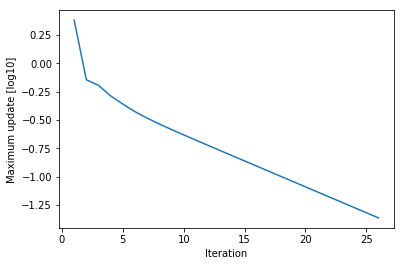

Iteration: 27
Iteration: 28
Iteration: 29
Iteration: 30
Iteration: 31
Iteration: 32
Iteration: 33
Iteration: 34
Iteration: 35
Iteration: 36
Iteration: 37
Iteration: 38
Iteration: 39
Iteration: 40
Iteration: 41
Iteration: 42
Iteration: 43
Iteration: 44
Iteration: 45
Iteration: 46
Iteration: 47
Iteration: 48
Iteration: 49
Iteration: 50
Iteration: 51
Iteration: 52
Iteration: 53
Iteration: 54
Iteration: 55
Iteration: 56
Iteration: 57
Iteration: 58
Iteration: 59
Iteration: 60
Iteration: 61
Iteration: 62
Iteration: 63
Iteration: 64
Iteration: 65
Iteration: 66
Iteration: 67
Iteration: 68
Iteration: 69
Iteration: 70
Iteration: 71
Iteration: 72
Iteration: 73
Iteration: 74
Iteration: 75
Iteration: 76


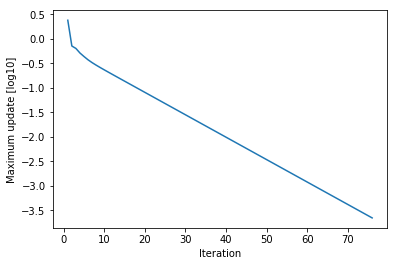

Iteration: 77
Iteration: 78
Iteration: 79
Iteration: 80
Iteration: 81
Iteration: 82
Iteration: 83
Iteration: 84
Iteration: 85
Iteration: 86
Iteration: 87
Iteration: 88
Iteration: 89
Iteration: 90
Iteration: 91
Iteration: 92
Iteration: 93
Iteration: 94
Iteration: 95
Iteration: 96
Iteration: 97
Iteration: 98
Iteration: 99
Iteration: 100
Iteration: 101
Iteration: 102
Iteration: 103
Iteration: 104
Iteration: 105
Iteration: 106
Iteration: 107
Iteration: 108
Iteration: 109
Iteration: 110
Iteration: 111
Iteration: 112
Iteration: 113
Iteration: 114
Iteration: 115
Iteration: 116
Iteration: 117
Iteration: 118
Iteration: 119
Iteration: 120
Iteration: 121
Iteration: 122
Iteration: 123
Iteration: 124
Iteration: 125
Iteration: 126


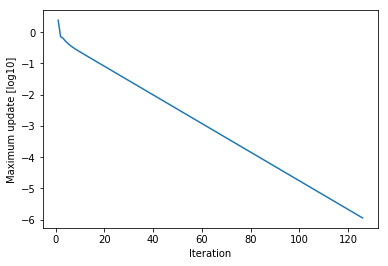

Iteration: 127
Iteration: 128
Iteration: 129
Iteration: 130
Iteration: 131
Iteration: 132
Iteration: 133
Iteration: 134
Iteration: 135
Iteration: 136
Iteration: 137
Iteration: 138
Iteration: 139
Iteration: 140
Iteration: 141
Iteration: 142
Iteration: 143
Iteration: 144
Iteration: 145
Iteration: 146
Iteration: 147
Iteration: 148
Iteration: 149
Iteration: 150
Iteration: 151
Iteration: 152
Iteration: 153
Iteration: 154
Iteration: 155
Iteration: 156
Iteration: 157
Iteration: 158
Iteration: 159
Iteration: 160
Iteration: 161
Iteration: 162
Iteration: 163
Iteration: 164
Iteration: 165
Iteration: 166
Iteration: 167
Iteration: 168
Iteration: 169
Iteration: 170
Iteration: 171
Iteration: 172
Iteration: 173
Iteration: 174
Iteration: 175
Iteration: 176


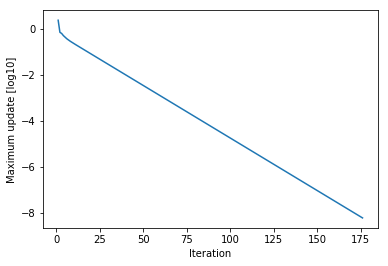

Iteration: 177
Iteration: 178
Iteration: 179
Iteration: 180
Iteration: 181
Iteration: 182
Iteration: 183
Iteration: 184
Iteration: 185
Iteration: 186
Iteration: 187
Iteration: 188
Iteration: 189
Iteration: 190
Iteration: 191
Iteration: 192
Iteration: 193
Iteration: 194
Iteration: 195
Iteration: 196
Iteration: 197
Iteration: 198
Iteration: 199
Iteration: 200
Iteration: 201
Iteration: 202
Iteration: 203
Iteration: 204
Iteration: 205
Iteration: 206
Iteration: 207
Iteration: 208
Iteration: 209
Iteration: 210
Iteration: 211
Iteration: 212
Iteration: 213
Iteration: 214
Iteration: 215
Converged after iteration 215


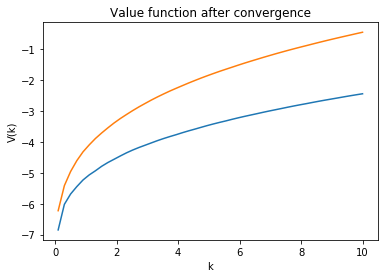

In [22]:
from matplotlib import pyplot as plt

difference_list = []
threshold = 1e-10
max_iterations = 10000
plot_interval = 50

V = V_init.copy()

for iteration in range(max_iterations):
    print('Iteration: {}'.format(iteration + 1))
    
    V_new = vf_update_iteration(V)
    difference = np.max(np.abs(V_new-V))
    
    difference_list.append(difference) 
    
    V = V_new.copy()
    
    if difference < threshold:
        print('Converged after iteration {}'.format(iteration + 1))
        
        plt.figure()
        plt.plot(k_grid[0,:], V[0,:], label='s=1')
        plt.plot(k_grid[0,:], V[1,:], label='s=2')
        plt.xlabel('k')
        plt.ylabel('V(k)')
        plt.title('Value function after convergence')
        plt.show();
        break
        
    if iteration%plot_interval == 25:
        
        plt.figure()
        plt.plot(np.arange(1, iteration+2), np.log10(np.array(difference_list)))
        plt.xlabel('Iteration')
        plt.ylabel('Maximum update [log10]')
        plt.show();

In [23]:
# N=500

In [24]:
N = 500 # number of grid-points for the capital grid
k_low = 0.1 # lower bound for the capital grid
k_high = 10 # upper bound for capital grid
k_grid = np.linspace(k_low, k_high, N).reshape(1, N) #grid for capital

# Now we initialize the value function, I like to initialize it to zero.
V_init = np.zeros((2, N))

Iteration: 1
Iteration: 2
Iteration: 3
Iteration: 4
Iteration: 5
Iteration: 6
Iteration: 7
Iteration: 8
Iteration: 9
Iteration: 10
Iteration: 11
Iteration: 12
Iteration: 13
Iteration: 14
Iteration: 15
Iteration: 16
Iteration: 17
Iteration: 18
Iteration: 19
Iteration: 20
Iteration: 21
Iteration: 22
Iteration: 23
Iteration: 24
Iteration: 25
Iteration: 26


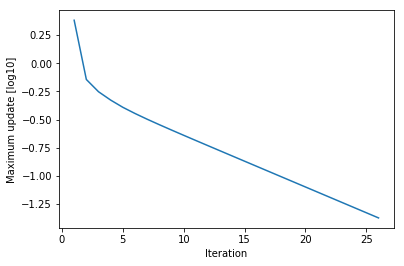

Iteration: 27
Iteration: 28
Iteration: 29
Iteration: 30
Iteration: 31
Iteration: 32
Iteration: 33
Iteration: 34
Iteration: 35
Iteration: 36
Iteration: 37
Iteration: 38
Iteration: 39
Iteration: 40
Iteration: 41
Iteration: 42
Iteration: 43
Iteration: 44
Iteration: 45
Iteration: 46
Iteration: 47
Iteration: 48
Iteration: 49
Iteration: 50
Iteration: 51
Iteration: 52
Iteration: 53
Iteration: 54
Iteration: 55
Iteration: 56
Iteration: 57
Iteration: 58
Iteration: 59
Iteration: 60
Iteration: 61
Iteration: 62
Iteration: 63
Iteration: 64
Iteration: 65
Iteration: 66
Iteration: 67
Iteration: 68
Iteration: 69
Iteration: 70
Iteration: 71
Iteration: 72
Iteration: 73
Iteration: 74
Iteration: 75
Iteration: 76


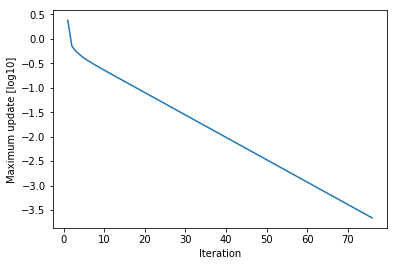

Iteration: 77
Iteration: 78
Iteration: 79
Iteration: 80
Iteration: 81
Iteration: 82
Iteration: 83
Iteration: 84
Iteration: 85
Iteration: 86
Iteration: 87
Iteration: 88
Iteration: 89
Iteration: 90
Iteration: 91
Iteration: 92
Iteration: 93
Iteration: 94
Iteration: 95
Iteration: 96
Iteration: 97
Iteration: 98
Iteration: 99
Iteration: 100
Iteration: 101
Iteration: 102
Iteration: 103
Iteration: 104
Iteration: 105
Iteration: 106
Iteration: 107
Iteration: 108
Iteration: 109
Iteration: 110
Iteration: 111
Iteration: 112
Iteration: 113
Iteration: 114
Iteration: 115
Iteration: 116
Iteration: 117
Iteration: 118
Iteration: 119
Iteration: 120
Iteration: 121
Iteration: 122
Iteration: 123
Iteration: 124
Iteration: 125
Iteration: 126


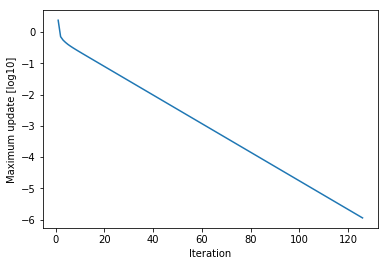

Iteration: 127
Iteration: 128
Iteration: 129
Iteration: 130
Iteration: 131
Iteration: 132
Iteration: 133
Iteration: 134
Iteration: 135
Iteration: 136
Iteration: 137
Iteration: 138
Iteration: 139
Iteration: 140
Iteration: 141
Iteration: 142
Iteration: 143
Iteration: 144
Iteration: 145
Iteration: 146
Iteration: 147
Iteration: 148
Iteration: 149
Iteration: 150
Iteration: 151
Iteration: 152
Iteration: 153
Iteration: 154
Iteration: 155
Iteration: 156
Iteration: 157
Iteration: 158
Iteration: 159
Iteration: 160
Iteration: 161
Iteration: 162
Iteration: 163
Iteration: 164
Iteration: 165
Iteration: 166
Iteration: 167
Iteration: 168
Iteration: 169
Iteration: 170
Iteration: 171
Iteration: 172
Iteration: 173
Iteration: 174
Iteration: 175
Iteration: 176


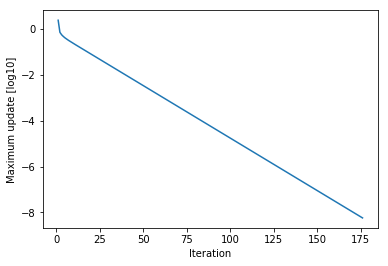

Iteration: 177
Iteration: 178
Iteration: 179
Iteration: 180
Iteration: 181
Iteration: 182
Iteration: 183
Iteration: 184
Iteration: 185
Iteration: 186
Iteration: 187
Iteration: 188
Iteration: 189
Iteration: 190
Iteration: 191
Iteration: 192
Iteration: 193
Iteration: 194
Iteration: 195
Iteration: 196
Iteration: 197
Iteration: 198
Iteration: 199
Iteration: 200
Iteration: 201
Iteration: 202
Iteration: 203
Iteration: 204
Iteration: 205
Iteration: 206
Iteration: 207
Iteration: 208
Iteration: 209
Iteration: 210
Iteration: 211
Iteration: 212
Iteration: 213
Iteration: 214
Iteration: 215
Converged after iteration 215


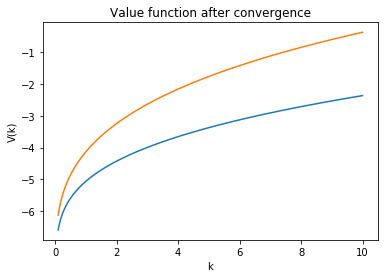

In [25]:
from matplotlib import pyplot as plt

difference_list = []
threshold = 1e-10
max_iterations = 10000
plot_interval = 50

V = V_init.copy()

for iteration in range(max_iterations):
    print('Iteration: {}'.format(iteration + 1))
    
    V_new = vf_update_iteration(V)
    difference = np.max(np.abs(V_new-V))
    
    difference_list.append(difference) 
    
    V = V_new.copy()
    
    if difference < threshold:
        print('Converged after iteration {}'.format(iteration + 1))
        
        plt.figure()
        plt.plot(k_grid[0,:], V[0,:], label='s=1')
        plt.plot(k_grid[0,:], V[1,:], label='s=2')
        plt.xlabel('k')
        plt.ylabel('V(k)')
        plt.title('Value function after convergence')
        plt.show();
        break
        
    if iteration%plot_interval == 25:
        
        plt.figure()
        plt.plot(np.arange(1, iteration+2), np.log10(np.array(difference_list)))
        plt.xlabel('Iteration')
        plt.ylabel('Maximum update [log10]')
        plt.show();